# Rede Neural aplicada no MNIST

Neste notebook iremos utilizar uma rede neural para treinar e classificar o conjunto de dados do MNIST.

In [2]:
import os
os.environ['KERAS_BACKEND'] = 'tensorflow'

In [3]:
%matplotlib inline
import matplotlib.pyplot as plot
from IPython import display

import numpy as np
import scipy
import argparse

import sys
import tensorflow as tf

import keras
from keras.models import Sequential
from keras.layers.core import Activation
from keras.layers.core import Dense
from keras.layers.core import Dropout

from keras.optimizers import SGD, RMSprop
from keras.utils import np_utils

print('Keras ', keras.__version__)
print('TensorFlow', tf.__version__)
print('Numpy ', np.__version__)

Using TensorFlow backend.


Keras  2.0.3
TensorFlow 1.0.1
Numpy  1.12.1


## Leitura do dataset MNIST

In [4]:
from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(60000, 28, 28) (10000, 28, 28)
(60000,) (10000,)


## Pequena amostras apenas para testar o código

In [5]:
# Colocar False para testar com todos os dados
teste = True
if teste:
    n_samples_train = 100
    n_samples_test  = 60

    X_train = X_train[:n_samples_train]
    y_train = y_train[:n_samples_train]
    X_test = X_test[:n_samples_test]
    y_test = y_test[:n_samples_test]

    print(X_train.shape, X_test.shape)
    print(y_train.shape, y_test.shape)

(100, 28, 28) (60, 28, 28)
(100,) (60,)


## Normalização dos dados

In [6]:
# 28*28=784
# Make the images 1D
X_train = X_train.reshape(-1, 784) / 255.0
X_test = X_test.reshape(-1, 784) / 255.0

## Conventendo para one-hot encoding

In [7]:
y_oh_train = np_utils.to_categorical(y_train, 10)
y_oh_test = np_utils.to_categorical(y_test, 10)

## Criação do modelo da rede

Este modelo apresenta:
- Entrada com vetor de 784 atributos.
- Duas camadas densas.
- Primeira camada com 30 neurônios.
- Camada de saída com 10 neurônios.
- Ativação final por softmax.

In [8]:
def my_neural_net():
    model = Sequential()

    model.add(Dense(30, input_shape=(784,)))
    model.add(Activation("relu"))

    model.add(Dense(10))
    model.add(Activation("softmax"))

    return model

print("Criando o modelo...")
model = my_neural_net()
model.summary()

Criando o modelo...
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 30)                23550     
_________________________________________________________________
activation_1 (Activation)    (None, 30)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                310       
_________________________________________________________________
activation_2 (Activation)    (None, 10)                0         
Total params: 23,860
Trainable params: 23,860
Non-trainable params: 0
_________________________________________________________________


## Laço de treinamento

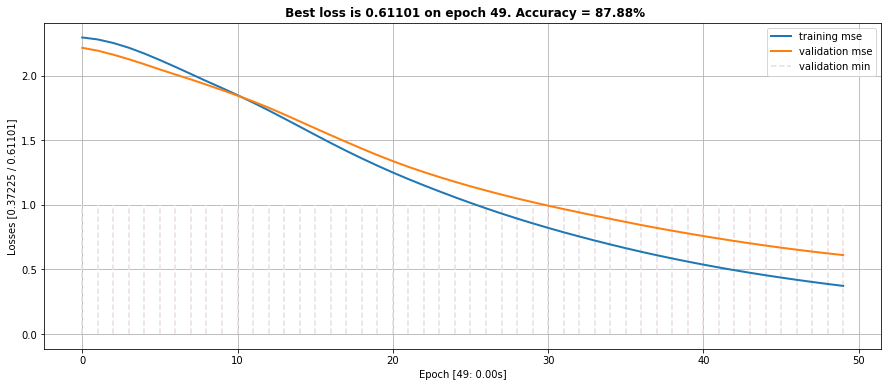

In [9]:
# Importa TrainingPlotter
sys.path.append('../src')
from my_keras_utilities import TrainingPlotter

nepochs = 50    # Número de épocas para o treinamento

# Cria o callback para mostrar os plots a cada época
my_big_callback = TrainingPlotter(patience=15)

# inicializa o otimizador e o modelo
print("[INFO] compilando o modelo...")
opt = SGD(lr=0.01, momentum=0.9)
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])    
    
fig = plot.figure(figsize=(15,6))
plot.grid(True)

print("[INFO] treinando...")
try:
    histo2 = model.fit(X_train, y_oh_train, 
                       batch_size=128, 
                       epochs=nepochs, 
                       verbose=0, 
                       validation_split=0.33, 
                       callbacks=[my_big_callback])
    
    # Observe que é realizado uma divisão do conjunto de teste 33% é utilizado para validação.
except KeyboardInterrupt:
    pass

## Avaliando os dados de teste

In [10]:
loss, accuracy = model.evaluate(X_test, y_oh_test, batch_size=128, verbose=1)
print("Acurácia dos dados de teste: {:.2f}%".format(accuracy * 100))

60/60 [==============================] - 0s
Acurácia dos dados de teste: 68.33%


## Mostrando algumas predições

In [11]:
print(y_test.shape)
print(y_test[:10])

vpred = model.predict_classes(X_test,verbose=0)
print(vpred.shape)
print(vpred[:10])

(60,)
[7 2 1 0 4 1 4 9 5 9]
(60,)
[7 3 1 0 4 1 9 4 4 9]


## Mostrando algumas amostras classificadas erroneamente

predito:classe_real


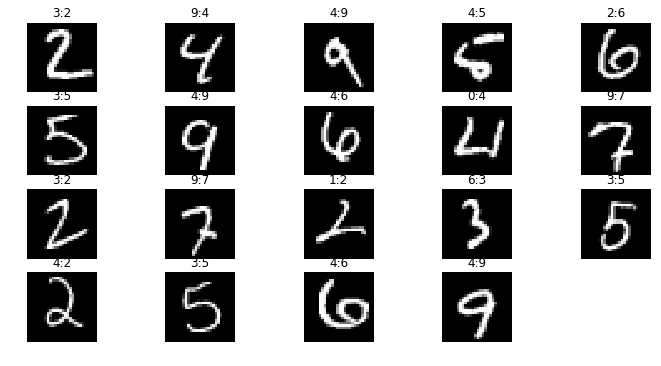

In [12]:
# Escolhe alguns dados incorretos
incorrect_indexes = np.where(vpred != y_test)[0][:40]

plot.figure(figsize=(12, 12))

print('predito:classe_real')

for k, ind in enumerate(incorrect_indexes):
    plot.subplot(8, 5, k + 1)

    image = (X_test[ind].reshape(28,28) * 255).astype("uint8")

    # show the image and prediction
    plot.imshow(image,cmap='gray')
    plot.axis('off')
    plot.title('{}:{}'.format(vpred[ind],y_test[ind]))